# Customer Segmentation in Marketing

# Mempersiapkan Data

Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:

1. Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
2. Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
3. Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
4. Umur: Umur dari pelanggan dalam format angka
5. Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
6. Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
7. Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.

# Mempersiapkan Library

Masalah ini akan dapat di selesaikan dengan menggunakan bantuan library - library di bawah ini:

1. Pandas, digunakan untuk melakukan pemrosesan analisis data
2. Matplotlib, digunakan sebagai dasar untuk melakukan visualisasi data
3. Seaborn, digunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
4. Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
5. kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
6. Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder 

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path

# Melihat Data Customer

Langkah pertama yang perlu di lakukan adalah membaca data tersebut yang semula adalah textfile menjadi pandas dataframe.

In [2]:
import pandas as pd

# import dataset  
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t")
  
# menampilkan data  
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


# Membaca Informasi dari Data

mengetahui jumlah baris dan kolom, nama kolom, identifikasi null values,  dan juga mengetahui tipe data dengan mudah.

In [3]:
import pandas as pd
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t") 

# Menampilkan informasi data  
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


# Kesimpulan 1

Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:

1. Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
2. Tidak ada nilai null pada data
3. Dua kolom memiliki tipe data numeric dan lima data bertipe string

# Eksplorasi Data Numerik

melihat distribusi data dari data yang berjenis numerik menggunakan boxplot dan juga histogram untuk melihat distribusi datanya

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

<Figure size 432x288 with 0 Axes>

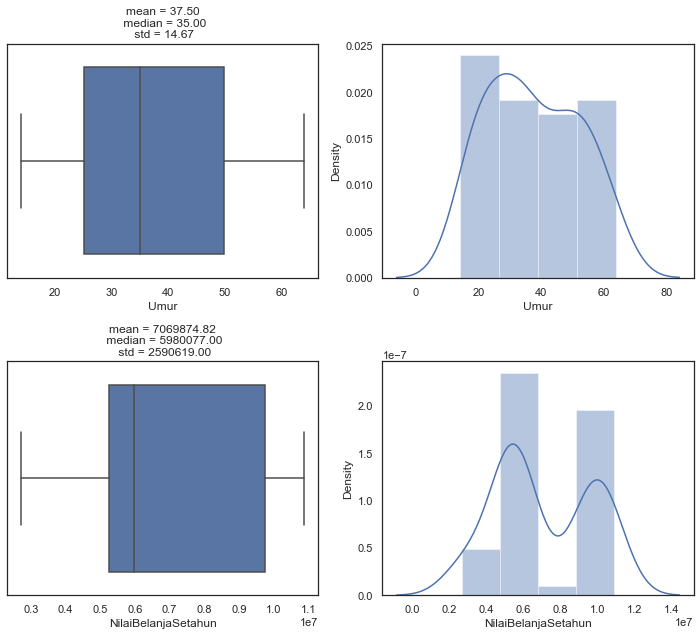

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t")
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show() 
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)

# Eksplorasi Data Kategorik

Selain data numerik, perlu melihat bagaimana persebaran data pada kolom-kolom yang memiliki jenis kategorikal yaitu Jenis Kelamin, Profesi dan Tipe Residen. Kamu dapat melakukan hal ini dengan menggunakan countplot dari library seaborn.

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

<Figure size 432x288 with 0 Axes>

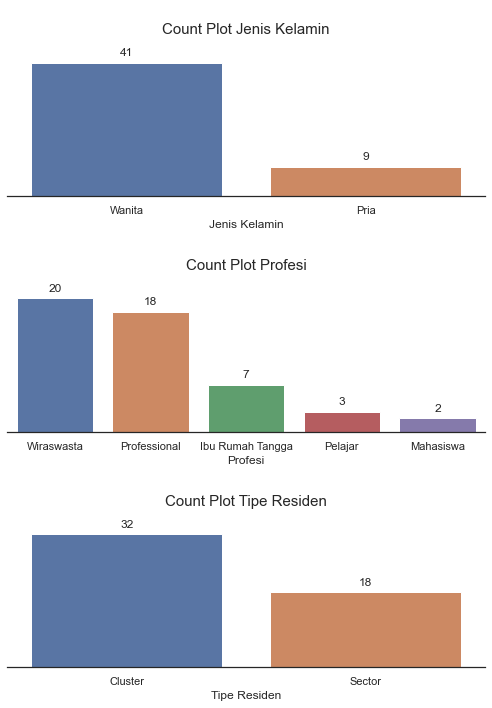

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t")
plt.clf()
  
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen'] 

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

# Kesimpulan 2

Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:

1. Rata-rata dari umur pelanggan adalah 37.5 tahun
2. Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
3. Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
4. Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
5. Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor

# Mempersiapkan Data Sebelum Permodelan

# Standarisasi Kolom Numerik

Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, perlu menjadikan data-data numerik yang kamu miliki berada pada satu skala. Hal ini dapat dilakukan dengan melakukan standardisasi data yang kamu miliki. Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan dibentuk dan juga tiap variabel akan dianggap sama pentingnya oleh algoritma yang akan digunakan.

In [11]:
import pandas as pd
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t")

from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


# Konversi Kategorikal Data dengan Label Encoder

Selanjutnya perlu merubah kolom-kolom yang berjenis kategorik menjadi angka. Kita akan menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik.

In [12]:
import pandas as pd
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t")

from sklearn.preprocessing import LabelEncoder

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


# Menggabungkan data untuk melakukan Permodelan

Setelah menyelesaikan dua tahap sebelumnya, kali ini kamu akan menggabungkan kedua hasil pemrosesan tersebut menjadi satu data frame. Data frame ini yang akan digunakan untuk permodelan.

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t")

kolom_numerik  = ['Umur','NilaiBelanjaSetahun']
df_std = StandardScaler().fit_transform(df[kolom_numerik])
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)
 
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
df_encode = df[kolom_kategorikal].copy()
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


# Mencari Jumlah Cluster yang Optimal

Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

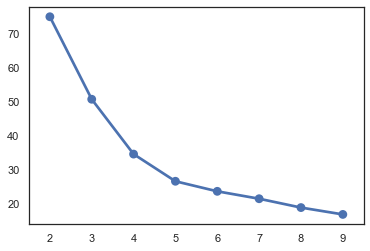

In [14]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_model = pd.read_csv('Segmentasi Pasar.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}
for k in range(2,10):
  kproto = KPrototypes(n_clusters = k,random_state=75)
  kproto.fit_predict(df_model, categorical=[0,1,2])
  cost[k]= kproto.cost_
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

# Membuat Model

Selanjutnya melakukan pembuatan model dengan jumlah kluster yang sudah didapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file.

In [15]:
import pandas as pd 
df_model = pd.read_csv('Segmentasi Pasar.csv')

import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

# Menggunakan Model

 Kali ini akan menggunakan model tersebut untuk menentukan segmen pelanggan yang ada di dataset.

In [16]:
import pandas as pd
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("Segmentasi Pasar", sep="\t") 
df_model = pd.read_csv('Segmentasi Pasar.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

# Menentukan segmen tiap pelanggan    
clusters = kproto.predict(df_model, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head())  


FileNotFoundError: [Errno 2] No such file or directory: 'Segmentasi Pasar'

# Menampilkan Cluster Tiap Pelanggan

Setelah menggabungkan data awal pelanggan dan cluster-nya, perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu dalam memberi nama tiap cluster berdasarkan karakteristiknya.

In [ ]:
import pandas as pd
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("Segmentasi Pasar", sep="\t") 
df_model = pd.read_csv('Segmentasi Pasar.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):
    print('\nPelanggan cluster: {}\n'.format(i))
    print(df_final[df_final['cluster']== i])



# Visualisasi Hasil Clustering menggunakan Box Plot

visualisasi hasil clustering untuk dapat memudahkan dalam melakukan penamaan di tiap-tiap cluster.

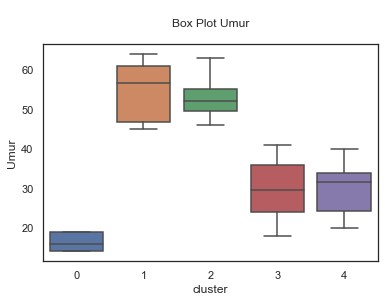

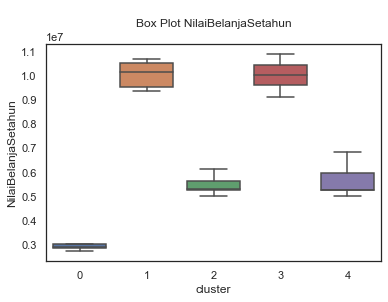

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t") 
df_model = pd.read_csv('Segmentasi Pasar.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()


# Visualisasi Hasil Clustering menggunakan Count Plot

membuat visualisasi hasil clustering untuk dapat melakukan penamaan di tiap-tiap cluster.

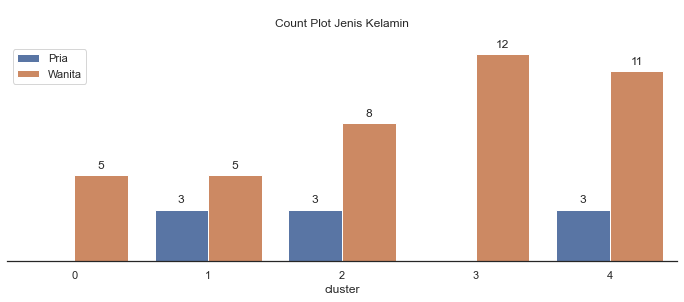

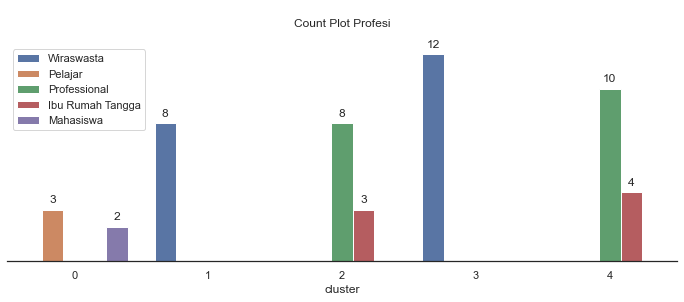

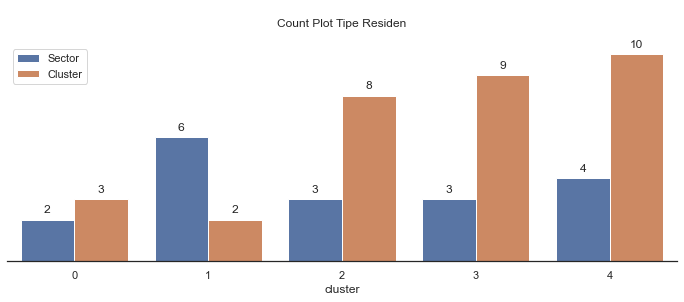

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t") 
df_model = pd.read_csv('Segmentasi Pasar.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:
    plt.figure(figsize=(12,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper left")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()

# Menamakan Cluster

Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor klusternya, yaitu:

1. Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
2. Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
3. Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
4. Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.
5. Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("Segmentasi Pasar.txt", sep="\t") 
df_model = pd.read_csv('Segmentasi Pasar.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    